In [ ]:
%%capture
!pip install librosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading and Visualizing Dataset with Librosa

In [ ]:
import matplotlib.pyplot as plt                       
import librosa                                        
import librosa.display                                
import os                                             
import scipy.io.wavfile                               
import numpy as np                                    
import glob

In [ ]:
AUDIO_FOLDER = "drive/MyDrive/UNI-AMRITA-SEM2/MLforBigData/MLBD_Project/MLBD_Dataset/IndianAudioDataset/"
OUTPUT_FOLDER = "drive/MyDrive/UNI-AMRITA-SEM2/MLforBigData/MLBD_Project/MLBD_Dataset/Processed/"

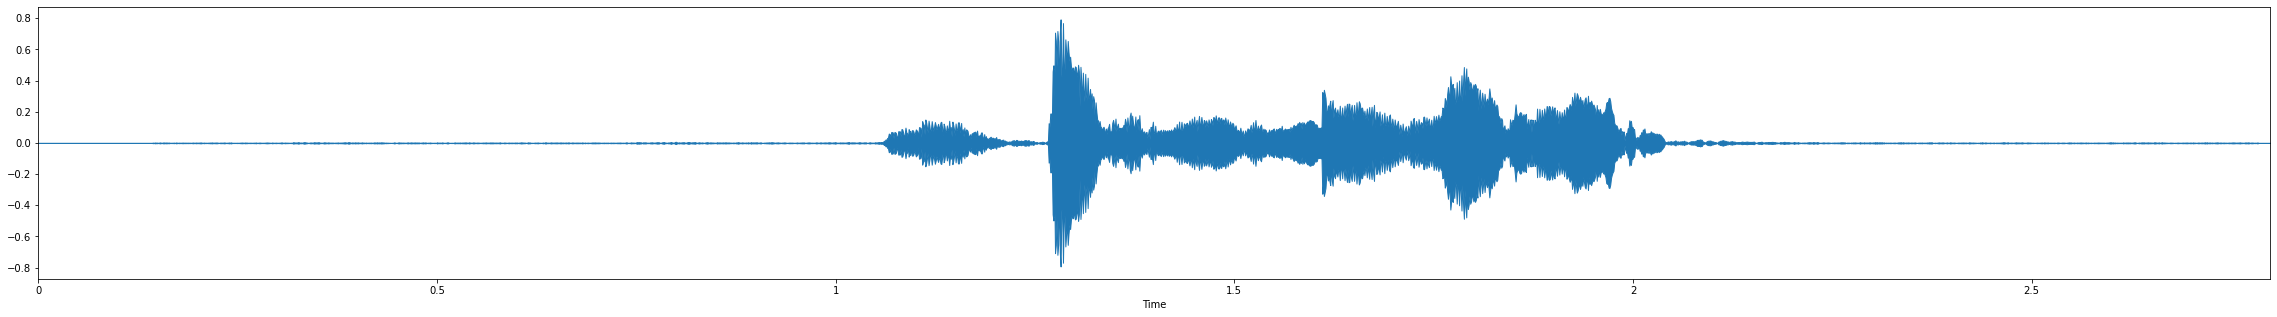

In [ ]:
# Import one audio file with librosa
data, sampling_rate = librosa.load("drive/MyDrive/UNI-AMRITA-SEM2/MLforBigData/MLBD_Project/MLBD_Dataset/IndianAudioDataset/anger/Anger_Deepthi.wav")
plt.figure(figsize=(40, 5))                           # Shape of audio figure
librosa.display.waveplot(data, sr=sampling_rate)      # Show audio

In [ ]:
# Load in audio file
y, sr = librosa.load("drive/MyDrive/UNI-AMRITA-SEM2/MLforBigData/MLBD_Project/MLBD_Dataset/IndianAudioDataset/anger/Anger_Deepthi.wav")
yt,_=librosa.effects.trim(y)                          # Trim leading and trailing silence from an audio signal.

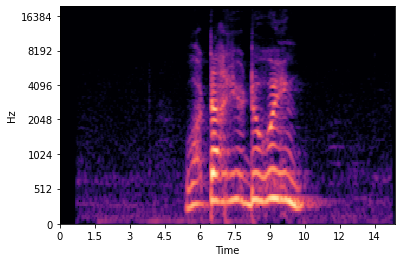

In [ ]:
# A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale
audio_spectogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
# Convert a power spectrogram (amplitude squared) to decibel (dB) units with power_to_db
audio_spectogram = librosa.power_to_db(audio_spectogram, ref=np.max)
# Display the spectrogram with specshow
librosa.display.specshow(audio_spectogram, y_axis='mel', fmax=20000, x_axis='time')

## Preprocessing Dataset

Get the labels first

In [ ]:
labels = {"calm":0, "anger":1, "fear":2, "sad":3}

emotion_labels = []
for emotion in os.listdir(AUDIO_FOLDER):
  emotion_label = emotion 
  for clip in os.listdir(AUDIO_FOLDER+'/'+emotion):
    emotion_labels.append(emotion_label)

In [ ]:
print(emotion_labels)

['anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'anger', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad']


## Saving each audio file as a spectrogram image

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done actor!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done actor!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done actor!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done actor!


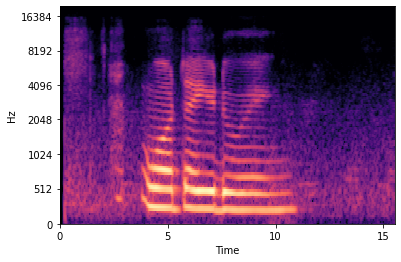

In [ ]:
count = 0
for emotion in glob.glob(AUDIO_FOLDER+"/*"):               # Loop through each emotion in the data set 
  for audioFile in glob.glob(emotion +'/*'):          # Loop over each audio file in that directory
    emotion_label=emotion_labels[count]
    save_path = OUTPUT_FOLDER + emotion_label       # This line assumes that the emotion directories exist within the output path folder
    # Convert to melspectrogram
    y, sr = librosa.load(audioFile)                 # Load the file with librosa
    yt,_=librosa.effects.trim(y)                    # Trim leading and trailing silence from an audio signal.          
    y=yt
    # Creare spectrogram from audio file
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time')
    p = os.path.join(save_path, "{}_{}.jpg".format(emotion_label, str(count)))
    count+=1
    # Save to the aforementioned path
    plt.savefig(p)
    print("Done!")
  print("Done actor!")                                                         

## Create an Image Data Loader